### 摘要

* 数据可视化
  1. 基本绘图样式
  2. 其他绘图样式
    * 柱状图
    * 直方图
    * 面积图
    * 散点图
    * 六角图(hexbin)
    * 饼状图

  3. 绘图设计样式


In [1]:
# 首先当然是导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option("display.notebook_repr_html",False)
pd.set_option("display.max_columns",6)
pd.set_option("display.max_rows",15)
pd.set_option("display.width",78)
pd.set_option("precision",4)

### 基本绘图：plot

In [ ]:
#基于Series，DataFrame的plot方法其实只是一个plt.plot的简单封装
ts = pd.Series(np.random.randn(1000),index=pd.date_range("20160412",periods=1000))
ts = ts.cumsum()

ts.plot()

#如果索引包含日期，
#plot就会调用gcf().autofmt_xdate试图将x轴格式化成更友好的方式，如下

In [ ]:
df = pd.DataFrame(np.random.randn(1000,4),index=pd.date_range("20160401",periods=1000),
                  columns=list("ABCD"))
df = df.cumsum()

#plt.figure();df.plot()
df.plot()

In [ ]:
#也能够通过x，y关键字参数指定plot的x，y轴
df3 = pd.DataFrame(np.random.randn(1000,2),columns=["B","C"])
df3 = df3.cumsum()

df3["A"] = pd.Series(list(range(len(df))))
df3.plot(x="A",y="B")

### 其他绘图样式
plot方法可以使用其他样式，通过kind关键字参数指定，其中包括
  
  * "bar"或者"barh",柱状图
  * "hist",直方图
  * "area",区域图
  * "scatter",散点图
  * "hexbin",六角图
  * "pie",饼状图

#### 柱状图

In [10]:
df2 = pd.DataFrame(np.random.randn(10,4),columns=list("ABCD"))

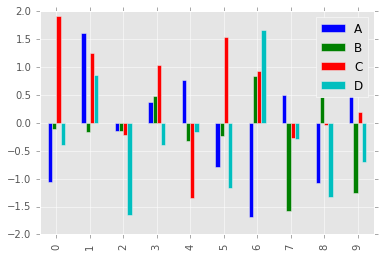

In [12]:
#df2.plot
df2.plot.bar()
#df2.plot(kind="bar")

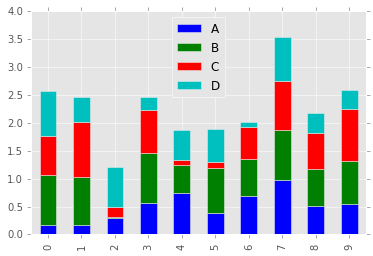

In [6]:
#可以将数据堆积起来
df2.plot.bar(stacked=True)

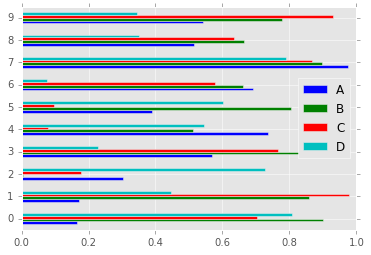

In [8]:
#也可以通过barh将数据横向展示
#df2.plot.barh(stacked=True)#

df2.plot.barh(stacked=False)

#### 直方图

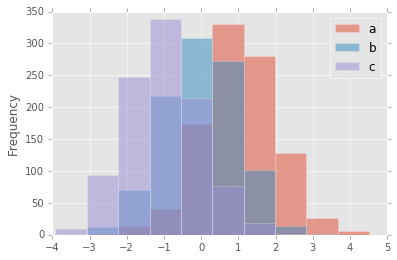

In [25]:
df3 = pd.DataFrame({"a":np.random.randn(1000) + 1,
                    "b":np.random.randn(1000),
                    "c":np.random.randn(1000) - 1},
                    columns=["a","b","c"])

df3.plot.hist(alpha=0.5)
#alpha 指定透明度

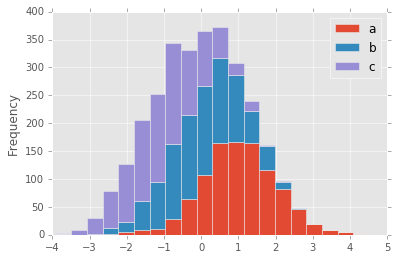

In [26]:
#使用stacked=True表示堆积，bins指定格子(bin)数量
df3.plot.hist(stacked=True,bins=20)

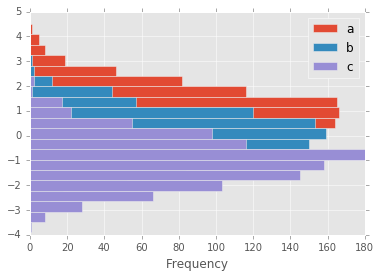

In [27]:
#通过orientation="horizontal"将显示方式改为水平
df3.plot.hist(orientation="horizontal",bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001299C7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001360DE10>]], dtype=object)

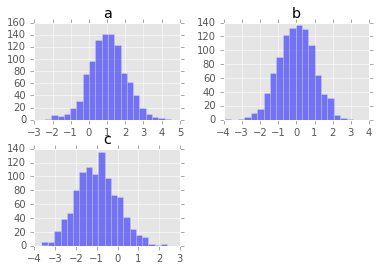

In [29]:
#将结果通过多个子图展示
#plt.figure()

df3.hist(color="b",alpha=0.5,bins=20)

#### 面积图
通过Series.plot.area()或者DataFrame.plot.area()创建,默认stacked，如果要生成stacked面积图，每个字段必须都为正数或者所有非负数。

当输入的数据包括NaN时，会自动用0填充，如果需要删除或者填充这些值，可以在绘图前调用DataFrame.dropna()或者DataFrame.fillna。

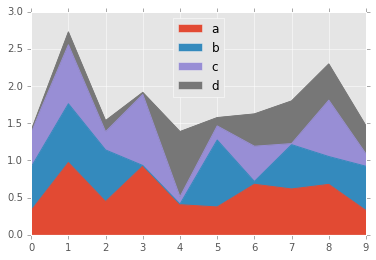

In [31]:
#注意: random.randn 与rand的区别是取的随机数样本不一样~
df = pd.DataFrame(np.random.rand(10,4),columns=list("abcd"))
df.plot.area()

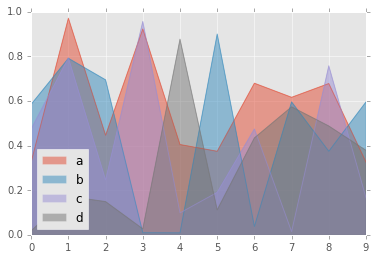

In [32]:
#指定stacked=False,使其不堆积
df.plot.area(stacked=False)

#### 散点图
散点图的x，y轴需要数值字段，可以通过x，y关键字参数指定x，y轴

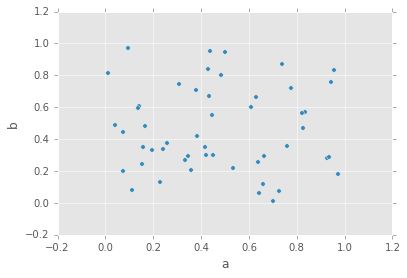

In [33]:
df = pd.DataFrame(np.random.rand(50,4),columns=list("abcd"))
df.plot.scatter(x="a",y="b")

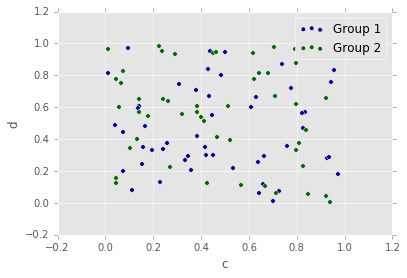

In [34]:
#指定多个字段组在单个轴绘图，可以指定ax重复plot方法，
#推荐指定颜色以及标签用以区别不同的组

ax = df.plot.scatter(x="a",y="b",color="DarkBlue",label="Group 1")
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

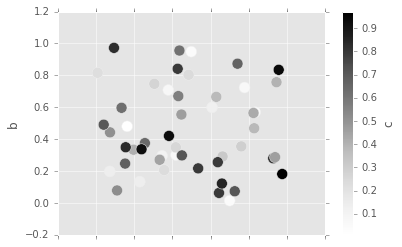

In [37]:
#通过c关键词参数指定色度条，s关键字参数指定点的大小
#注：传入的c,s对象都可以是等长的序列
df.plot.scatter(x="a",y="b",c="c",s=120)

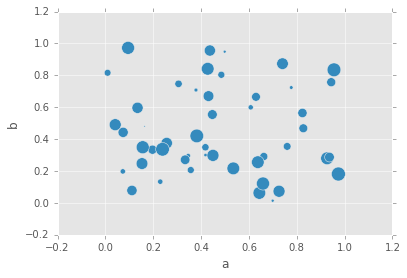

In [38]:
df.plot.scatter(x='a', y='b', s=df['c']*200);

#### 六边形图(Hexbin)

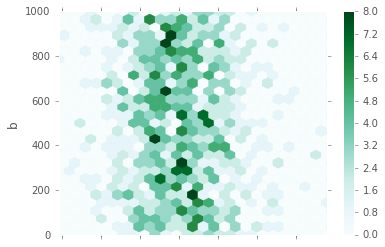

In [40]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x="a",y="b",gridsize=25)

#### 饼状图
如果数据包含NaN，它会自动用0填充，负值则会报ValueError

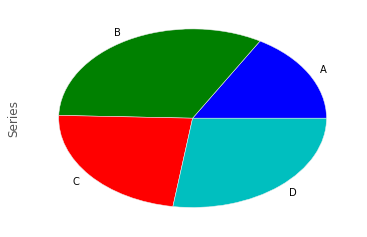

In [51]:
series = pd.Series(np.random.rand(4),index=list("ABCD"),name="Series")

series.plot.pie()

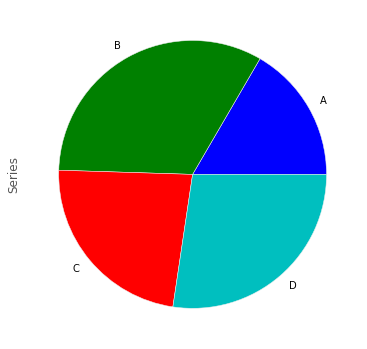

In [52]:
#如上所示，默认是有所收缩的，需要通过指定一样的长宽或者强制调用ax.set_aspect('equal') 
series.plot.pie(figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017438748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017A019B0>], dtype=object)

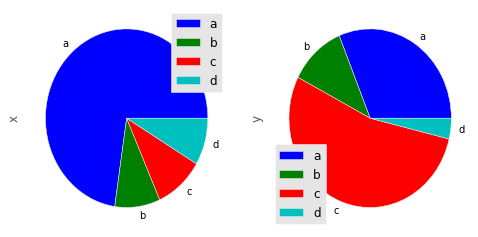

In [60]:
#注意DataFrame需要指定关键字参数y=，或者subplot=True
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
#df.plot.pie(figsize=(8, 4))
df.plot.pie(subplots=True, figsize=(8, 4))

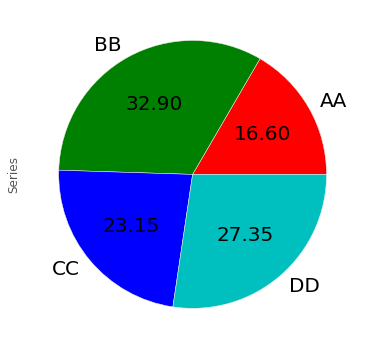

In [61]:
#还可以指定标签，字体大小等
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=20, figsize=(6, 6))

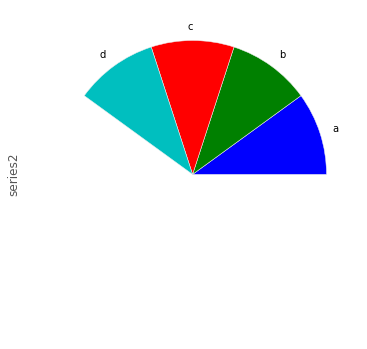

In [62]:
#如果传入的值总和小于1，会绘制一个扇形
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))

plt.savefig("text.png")

### 绘图设计样式
大多数plot方法拥有一套关键字参数用以控制返回图形的布局与样式~

[线条样式](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D)

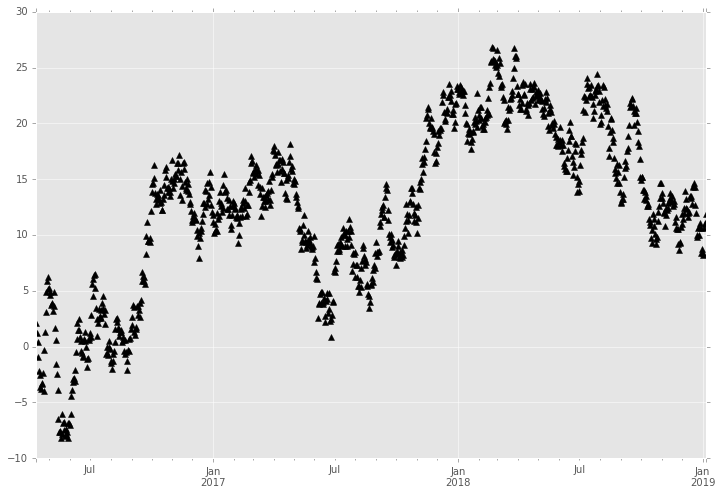

In [77]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("20160412",periods=1000))
ts = ts.cumsum()
ts.plot(style="k^",label="Series",figsize=(12,8))

#### 控制刻印文字(legend)
默认刻印文字是显示的，如下

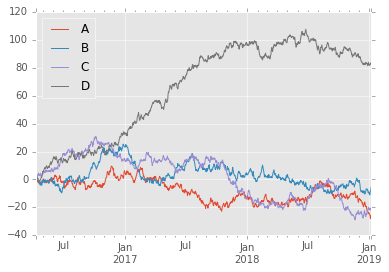

In [78]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

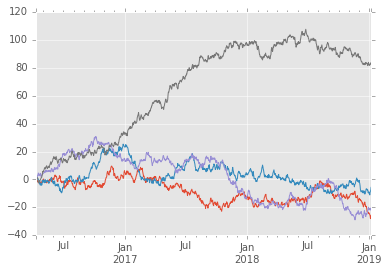

In [79]:
#将legend=False
df.plot(legend=False)

#### 比例

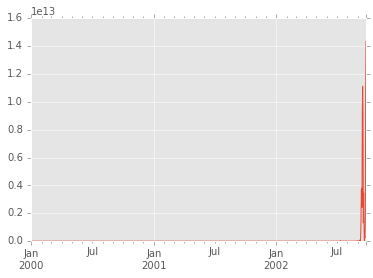

In [80]:
###如下，因为我们将数值给exp指数求值，所以下面的图不会太优雅
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot()

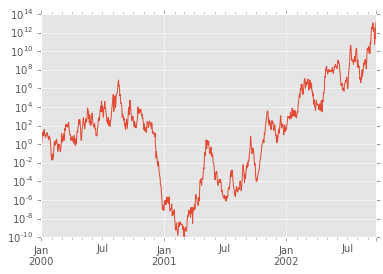

In [81]:
#当我们将y轴通过log指数缩放就相对而言要直观一些
ts.plot(logy=True)

#### 标注第二个Y轴

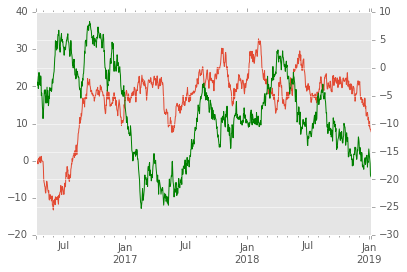

In [68]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')

#### 多窗口(subplot)
通过subplots关键字参数可以为不同的序列绘制不同的轴线

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018FEA908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019B92AC8>], dtype=object)

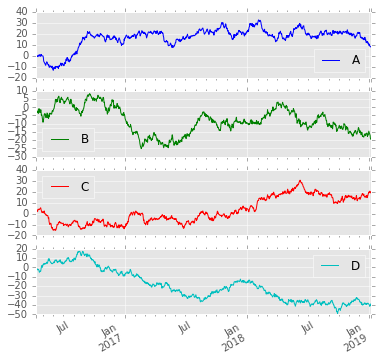

In [69]:
df.plot(subplots=True,figsize=(6,6))

#### 使用布局(layout)
通过layout关键字参数指定布局，它接受一个(行数，列数)的元组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020016EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000232E1A20>]], dtype=object)

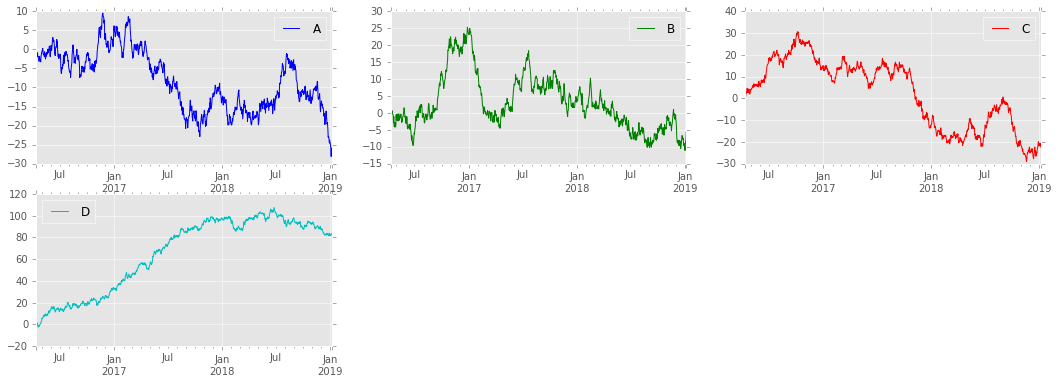

In [86]:
#通过sharex指定是否共享x轴
df.plot(subplots=True,layout=(2,3),figsize=(18,6),sharex=False)

#### 绘制数据表格

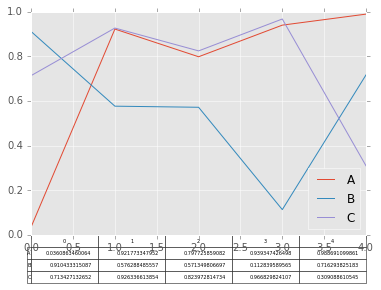

In [87]:

df = pd.DataFrame(np.random.rand(5,3),columns=["A","B","C"])

df.plot(table=True)

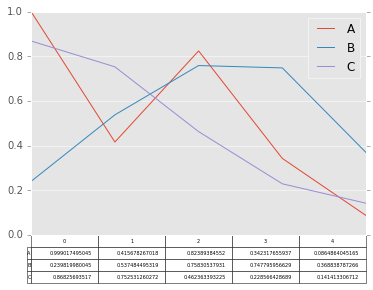

In [72]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5,3),columns=["A","B","C"])
ax.get_xaxis().set_visible(False)
df.plot(table=True,ax=ax)

#### 色谱(colormaps)
当需要绘制大量的数据序列的时候，需要不同的颜色用以区分，由于默认的[颜色](http://matplotlib.org/api/colors_api.html#matplotlib.colors.Colormap)可能会有重复，所以可以使用colormap关键字参数，来绘制一系列的不同颜色线条~
可选的[colormap](http://matplotlib.org/examples/color/colormaps_reference.html)
比如![](http://matplotlib.org/_images/colormaps_reference_05.png)
由于matplotlib不直接支持线状图的色谱，所以可能不易识别，所以使用尽可能不是那么连续的色谱，比如cubehelix

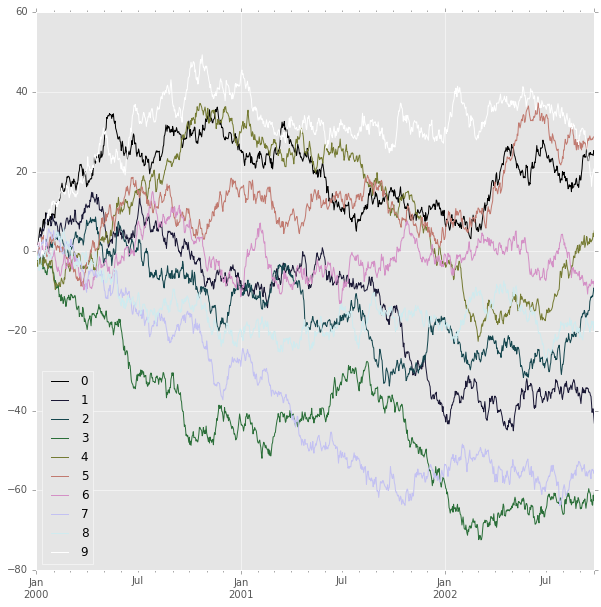

In [88]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)
df = df.cumsum()
df.plot(colormap="cubehelix",figsize=(10,10))

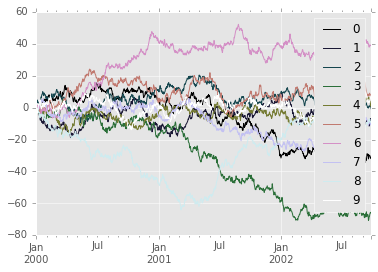

In [74]:
#或者传入matplotlib colormap对象
from matplotlib import cm
df.plot(colormap=cm.cubehelix)

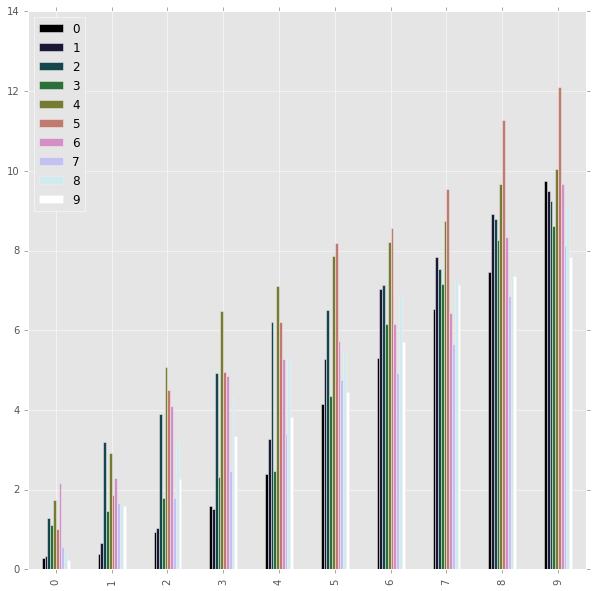

In [75]:
#当然也能用于柱状图
bars = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
bars = bars.cumsum()
bars.plot.bar(colormap="cubehelix",figsize=(10,10))